In [1]:
from nam.wrapper import NAMClassifier
import sklearn.metrics as sk_metrics
import pandas as pd
import numpy as np

c:\Users\javip\anaconda3\envs\nam\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NAMs on IRIS Dataset

In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Create a binary problem
iris['species'] = np.where(iris['species'] == 'Iris-setosa', 1, 0)

X = iris.drop('species', axis=1)
y = iris['species']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = NAMClassifier(
            num_epochs=20,
            num_learners=1,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 0.721 |
Epoch(0):           Validation Loss: 0.651 | ACCURACY: 0.314:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 0.721 |
Epoch(1):           Validation Loss: 0.651 | ACCURACY: 0.314:   5%|▌         | 1/20 [00:00<00:03,  6.23it/s]
                    Training Loss: 0.676 |
Epoch(2):           Validation Loss: 0.491 | ACCURACY: 0.000:   5%|▌         | 1/20 [00:00<00:03,  6.23it/s]
                    Training Loss: 0.503 |
Epoch(3):           Validation Loss: 0.422 | ACCURACY: 0.010:   5%|▌         | 1/20 [00:00<00:03,  6.23it/s]
                    Training Loss: 0.439 |
Epoch(3):           Validation Loss: 0.403 | ACCURACY: 0.167:   5%|▌         | 1/20 [00:00<00:03,  6.23it/s]
                    Training Loss: 0.439 |
Epoch(4):           Validation Loss: 0.403 | ACCURACY: 0.167:  20%|██        | 4/20 [00:00<00:00, 17.20it/s]
                    Training Loss: 0.444 |
Epoch(5):     

In [4]:
model.predict(X_test).squeeze()

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.])

In [5]:
(model.predict(X_test).squeeze() == y_test).sum() / len(y_test)

1.0

## NAMs on Diabetes Dataset

In [6]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [7]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=5,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   2%|▏         | 1/50 [00:00<00:05,  8.35it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 1/50 [00:00<00:05,  8.35it/s]
                    Training Loss: 4.345 |
Epoch(2):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 1/50 [00:00<00:05,  8.35it/s] 
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   6%|▌         | 3/50 [00:00<00:03, 13.11it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   6%|▌         | 3/50 [00:00<00:03, 13.11it/s]
                    Training Loss: 1.482 |
Epoch(4): 

In [8]:
pred = model.predict(X_test).squeeze()

In [9]:
(pred == y_test).sum() / len(y_test)

0.7207792207792207

Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   5%|▌         | 1/20 [00:00<00:04,  4.16it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   5%|▌         | 1/20 [00:00<00:04,  4.16it/s]
                    Training Loss: 4.345 |
Epoch(2):           Validation Loss: 2.126 | ACCURACY: 0.251:   5%|▌         | 1/20 [00:00<00:04,  4.16it/s] 
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:  15%|█▌        | 3/20 [00:00<00:01,  8.76it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:  15%|█▌        | 3/20 [00:00<00:01,  8.76it/s]
                    Training Loss: 1.482 |
Epoch(4): 

n_learners: 1, n_epochs: 20, accuracy: 0.7142857142857143


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   2%|▏         | 1/50 [00:00<00:05,  9.63it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 1/50 [00:00<00:05,  9.63it/s]
                    Training Loss: 4.345 |
Epoch(2):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 1/50 [00:00<00:05,  9.63it/s] 
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   6%|▌         | 3/50 [00:00<00:03, 12.98it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   6%|▌         | 3/50 [00:00<00:03, 12.98it/s]
                    Training Loss: 1.482 |
Epoch(4): 

n_learners: 1, n_epochs: 50, accuracy: 0.7337662337662337


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   3%|▎         | 2/70 [00:00<00:06, 10.66it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   3%|▎         | 2/70 [00:00<00:06, 10.66it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   3%|▎         | 2/70 [00:00<00:06, 10.66it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   6%|▌         | 4/70 [00:00<00:04, 13.88it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 1, n_epochs: 70, accuracy: 0.4935064935064935


Epoch(0):      | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   1%|          | 1/100 [00:00<00:15,  6.32it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   1%|          | 1/100 [00:00<00:15,  6.32it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 2/100 [00:00<00:12,  7.71it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 2/100 [00:00<00:12,  7.71it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   2%|▏         | 2/100 [00:00<00:12,  7.71it/s]
                    Training Loss: 3.024 |
Ep

n_learners: 1, n_epochs: 100, accuracy: 0.4935064935064935


Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:  10%|█         | 2/20 [00:00<00:01, 10.80it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:  10%|█         | 2/20 [00:00<00:01, 10.80it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:  10%|█         | 2/20 [00:00<00:01, 10.80it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:  20%|██        | 4/20 [00:00<00:01, 12.90it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 3, n_epochs: 20, accuracy: 0.7012987012987013


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:03, 12.30it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:03, 12.30it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:03, 12.30it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   4%|▍         | 2/50 [00:00<00:03, 12.30it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 3, n_epochs: 50, accuracy: 0.7272727272727273


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   3%|▎         | 2/70 [00:00<00:04, 14.87it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   3%|▎         | 2/70 [00:00<00:04, 14.87it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   3%|▎         | 2/70 [00:00<00:04, 14.87it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   3%|▎         | 2/70 [00:00<00:04, 14.87it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 3, n_epochs: 70, accuracy: 0.3051948051948052


Epoch(0):      | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 2/100 [00:00<00:08, 12.15it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 2/100 [00:00<00:08, 12.15it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   2%|▏         | 2/100 [00:00<00:08, 12.15it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   2%|▏         | 2/100 [00:00<00:08, 12.15it/s]
                    Training Loss: 1.482 |
Epoch(5):  

n_learners: 3, n_epochs: 100, accuracy: 0.3051948051948052


Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:  10%|█         | 2/20 [00:00<00:01, 11.90it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:  10%|█         | 2/20 [00:00<00:01, 11.90it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:  10%|█         | 2/20 [00:00<00:01, 11.90it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:  20%|██        | 4/20 [00:00<00:01, 15.22it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 5, n_epochs: 20, accuracy: 0.6948051948051948


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:03, 14.49it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:03, 14.49it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:03, 14.49it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   8%|▊         | 4/50 [00:00<00:02, 16.86it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 5, n_epochs: 50, accuracy: 0.7207792207792207


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   3%|▎         | 2/70 [00:00<00:06, 10.99it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   3%|▎         | 2/70 [00:00<00:06, 10.99it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   3%|▎         | 2/70 [00:00<00:06, 10.99it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   6%|▌         | 4/70 [00:00<00:04, 14.95it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 5, n_epochs: 70, accuracy: 0.3051948051948052


Epoch(0):      | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 2/100 [00:00<00:07, 13.94it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 2/100 [00:00<00:07, 13.94it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   2%|▏         | 2/100 [00:00<00:07, 13.94it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 4/100 [00:00<00:05, 16.69it/s]
                    Training Loss: 1.482 |
Epoch(5):  

n_learners: 5, n_epochs: 100, accuracy: 0.3051948051948052


Epoch(0):      | 0/20 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/20 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:  10%|█         | 2/20 [00:00<00:01, 14.44it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:  10%|█         | 2/20 [00:00<00:01, 14.44it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:  10%|█         | 2/20 [00:00<00:01, 14.44it/s]
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:  20%|██        | 4/20 [00:00<00:00, 16.43it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 10, n_epochs: 20, accuracy: 0.6948051948051948


Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:03, 13.10it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:03, 13.10it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:03, 13.10it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   4%|▍         | 2/50 [00:00<00:03, 13.10it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 10, n_epochs: 50, accuracy: 0.7077922077922078


Epoch(0):      | 0/70 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/70 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   3%|▎         | 2/70 [00:00<00:05, 12.90it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   3%|▎         | 2/70 [00:00<00:05, 12.90it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   3%|▎         | 2/70 [00:00<00:05, 12.90it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   3%|▎         | 2/70 [00:00<00:05, 12.90it/s]
                    Training Loss: 1.482 |
Epoch(5):         

n_learners: 10, n_epochs: 70, accuracy: 0.3051948051948052


Epoch(0):      | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(0):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/100 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   1%|          | 1/100 [00:00<00:17,  5.67it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   1%|          | 1/100 [00:00<00:17,  5.67it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   2%|▏         | 2/100 [00:00<00:21,  4.64it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   2%|▏         | 2/100 [00:00<00:21,  4.64it/s] 
                    Training Loss: 3.024 |
Epoch(3):           Validation Loss: 1.002 | ACCURACY: 0.054:   2%|▏         | 2/100 [00:00<00:21,  4.64it/s]
                    Training Loss: 3.024 |
Ep

n_learners: 10, n_epochs: 100, accuracy: 0.3051948051948052


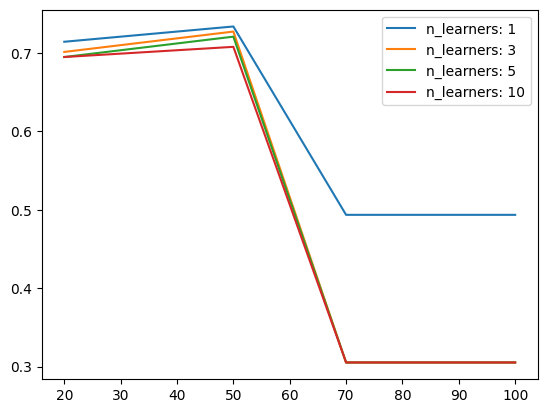

In [12]:
import matplotlib.pyplot as plt

for n_learners in [1, 3, 5, 10]:
    accs = []
    for n_epochs in [20, 50, 70, 100]:
        model = NAMClassifier(
            num_epochs=n_epochs,
            num_learners=n_learners,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

        model.fit(X_train, y_train)

        pred = model.predict(X_test).squeeze()
        acc = (pred == y_test).sum() / len(y_test)
        accs.append(acc)

        print(f"n_learners: {n_learners}, n_epochs: {n_epochs}, accuracy: {acc}")

    plt.plot([20, 50, 70, 100], accs, label=f'n_learners: {n_learners}')

plt.legend()
plt.show()